## A personal project analysing the English Premier League player data for the 2022/2023 season up to game week 22 (08/02/2023)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = r"events_premier-league_2022-23.csv"

#Create a DataFrame from the csv file
df = pd.read_csv(file)
df

,event_id,match_id,team,event_team,event_time,event_type,action_player_1,action_player_2
0,1,1,Fulham,home,16,Yellow card,João Palhinha,NaN
1,2,1,Tottenham,away,28,Yellow card,Son Heung-min,NaN
2,3,1,Tottenham,away,46,Goal,Harry Kane,Son Heung-min
3,4,1,Fulham,home,65,Substitution,Thomas Cairney,Harrison Reed
4,5,1,Tottenham,away,70,Yellow card,Cristian Romero,NaN
...,...,...,...,...,...,...,...,...
2852,2853,199,Arsenal,away,83,Substitution,Edward Nketiah,Gabriel Jesus
2853,2854,199,Arsenal,away,85,Own goal,Marc Guéhi,Own goal
2854,2855,199,Crystal Palace,home,86,Substitution,Will Hughes,Jeffrey Schlupp
2855,2856,199,Crystal Palace,home,86,Substitution,Malcolm Ebiowei,Eberechi Eze


In [3]:
#View a random sample of the dataframe up to 20 rows
df.sample(20)

,event_id,match_id,team,event_team,event_time,event_type,action_player_1,action_player_2
1410,1411,101,Chelsea,away,61,Yellow card,Kalidou Koulibaly,NaN
629,630,45,Liverpool,away,81,Goal,Stefan Bajčetić,NaN
2634,2635,184,Leeds,away,43,Yellow card,Jack Harrison,NaN
2255,2256,159,Fulham,home,48,Goal,Aleksandar Mitrović,Neeskens Kebano
2744,2745,191,Brighton,away,75,Substitution,Tariq Lamptey,Leandro Trossard
2714,2715,189,Everton,away,81,Substitution,Dele Alli,Conor Coady
400,401,30,Liverpool,away,9,Yellow card,Harvey Elliott,NaN
1043,1044,74,Fulham,home,24,Yellow card,Aleksandar Mitrović,NaN
1354,1355,97,Southampton,away,9,Goal,Che Adams,Romain Perraud
56,57,5,Crystal Palace,home,71,Substitution,Nathaniel Clyne,Joel Ward


In [4]:
#Create a variable from the main data showing only player involvement.
match_events = df.loc[:,"action_player_1":"action_player_2"]
match_events

,action_player_1,action_player_2
0,João Palhinha,NaN
1,Son Heung-min,NaN
2,Harry Kane,Son Heung-min
3,Thomas Cairney,Harrison Reed
4,Cristian Romero,NaN
...,...,...
2852,Edward Nketiah,Gabriel Jesus
2853,Marc Guéhi,Own goal
2854,Will Hughes,Jeffrey Schlupp
2855,Malcolm Ebiowei,Eberechi Eze


In [5]:
#Rename the index to event_type
event_idx = match_events.set_index(df.event_type)
event_idx

,action_player_1,action_player_2
event_type,,
Yellow card,João Palhinha,NaN
Yellow card,Son Heung-min,NaN
Goal,Harry Kane,Son Heung-min
Substitution,Thomas Cairney,Harrison Reed
Yellow card,Cristian Romero,NaN
...,...,...
Substitution,Edward Nketiah,Gabriel Jesus
Own goal,Marc Guéhi,Own goal
Substitution,Will Hughes,Jeffrey Schlupp


In [6]:
#Create a new variable from the renamed match_events
#selecting only the goal contributions
scorers = event_idx.loc[("Goal","Own goal","Penalty"), :]
scorers

,action_player_1,action_player_2
event_type,,
Goal,Harry Kane,Son Heung-min
Goal,Marcus Rashford,Bruno Fernandes
Goal,Edward Nketiah,Granit Xhaka
Goal,Bukayo Saka,Takehiro Tomiyasu
Goal,Lisandro Martínez,NaN
...,...,...
Penalty,Alexis Mac Allister,Penalty
Penalty,Alexis Mac Allister,Penalty
Penalty,Erling Haaland,Penalty


In [7]:
#Create a function to rename the columns in the dataframe
def tweak_cols(df: pd.DataFrame, col_1:str, col_2=None)-> pd.DataFrame:
    return df.rename(columns = {"action_player_1": col_1,
                                "action_player_2": col_2},)

In [8]:
#Rename the columns in the goal contribution variable
new_scorers = tweak_cols(scorers, "Scorer", "Assist")
new_scorers

,Scorer,Assist
event_type,,
Goal,Harry Kane,Son Heung-min
Goal,Marcus Rashford,Bruno Fernandes
Goal,Edward Nketiah,Granit Xhaka
Goal,Bukayo Saka,Takehiro Tomiyasu
Goal,Lisandro Martínez,NaN
...,...,...
Penalty,Alexis Mac Allister,Penalty
Penalty,Alexis Mac Allister,Penalty
Penalty,Erling Haaland,Penalty


## Goal scoring in the league

In [9]:
#Create a new variable from the renamed column
#showing the highest goal scorers
top_scorers = new_scorers.Scorer.value_counts()
top_scorers

 Erling Haaland          25
 Harry Kane              16
 Ivan Toney              13
 Aleksandar Mitrović     11
 Rodrigo Moreno          10
                         ..
 Ryan Christie            1
 Armando Broja            1
 Christian Pulisic        1
 Rodri                    1
 Jacob Murphy             1
Name: Scorer, Length: 202, dtype: int64

In [10]:
#Total goals scored in the league
print(f"Total goals scored: {top_scorers.sum(axis=0)}")

Total goals scored: 551


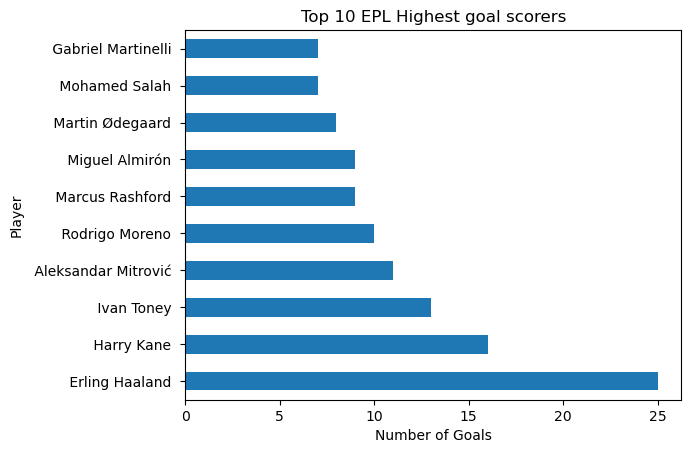

In [11]:
#Plot a horizontal barchart for the top 10 goal scorers.
plot = top_scorers[:10].plot.barh(title="Top 10 EPL Highest goal scorers",
                           fontsize= 10)
plot.set(xlabel="Number of Goals",
       ylabel="Player")

plt.show()

## Own goals scored in the league
***26 own goals scored***

***25 differrent players have scored own goals***

***Wout Faes the only player with 2 own goals***

In [12]:
#Create the own goal variable from the goal scorers variable
own_goals = new_scorers.loc["Own goal","Scorer"]

#Get the insights from the own goal variable
own_goals.describe()

count              26
unique             25
top        Wout Faes 
freq                2
Name: Scorer, dtype: object

## Penalties scored in the league

In [13]:
#Create penalties variable and get insights from penalty goals scored
penalties = new_scorers.loc["Penalty", "Scorer"]
penalties.describe()

count                   37
unique                  22
top        Erling Haaland 
freq                     4
Name: Scorer, dtype: object

## Assists in the league

In [14]:
#Get the insights from the Assists column in the scorers variable
new_scorers.Assist.value_counts()

 Penalty               37
 Own goal              26
 Kevin De Bruyne       11
 Christian Eriksen      7
 Bukayo Saka            7
                       ..
 Conor Gallagher        1
 Patrick Bamford        1
 Reiss Nelson           1
 Wilfried Gnonto        1
 Kaoru Mitoma           1
Name: Assist, Length: 183, dtype: int64

In [15]:
#Create a new variable for assists, excluding penalty goals and own goals.
assists = new_scorers.Assist.value_counts()[2:]
assists

 Kevin De Bruyne       11
 Christian Eriksen      7
 Bukayo Saka            7
 Alex Iwobi             5
 Andrew Robertson       5
                       ..
 Conor Gallagher        1
 Patrick Bamford        1
 Reiss Nelson           1
 Wilfried Gnonto        1
 Kaoru Mitoma           1
Name: Assist, Length: 181, dtype: int64

In [16]:
#Total assists in the league
print(f"Total Assists: {assists.sum()}")

Total Assists: 364


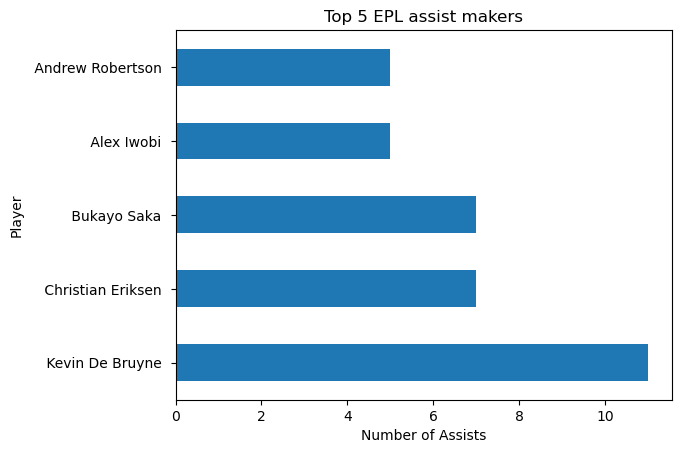

In [17]:
#Plot the top 5 assisters in the league
plot = assists[:5].plot.barh(title="Top 5 EPL assist makers",
                      fontsize=10)

plot.set(xlabel="Number of Assists",
       ylabel="Player")

plt.show()

## Player Substitutions

In [18]:
#Create a variable for player substitutions
subs = event_idx.loc["Substitution", "action_player_1":"action_player_2"]
subs

,action_player_1,action_player_2
event_type,,
Substitution,Thomas Cairney,Harrison Reed
Substitution,Richarlison,Son Heung-min
Substitution,Manor Solomon,Kenny Tete
Substitution,Carlos Vinícius,Willian
Substitution,Harry Wilson,Bobby Decordova-Reid
...,...,...
Substitution,Kieran Tierney,Olexandr Zinchenko
Substitution,Edward Nketiah,Gabriel Jesus
Substitution,Will Hughes,Jeffrey Schlupp


In [19]:
#Total games played so far
total_games = df.match_id.max()
print(f"Total games played: {total_games}")

Total games played: 199


In [20]:
#Average substitution per match
avr_sub = len(subs)/total_games
print(f"Average Substitution per game: {avr_sub:.2f}")

Average Substitution per game: 7.69


In [21]:
#Rename the subsitution columns
new_subs = tweak_cols(subs, "Player In", "Player Out")
new_subs

,Player In,Player Out
event_type,,
Substitution,Thomas Cairney,Harrison Reed
Substitution,Richarlison,Son Heung-min
Substitution,Manor Solomon,Kenny Tete
Substitution,Carlos Vinícius,Willian
Substitution,Harry Wilson,Bobby Decordova-Reid
...,...,...
Substitution,Kieran Tierney,Olexandr Zinchenko
Substitution,Edward Nketiah,Gabriel Jesus
Substitution,Will Hughes,Jeffrey Schlupp


**Total subs - 1530**

**Most subbed out - Mbeumo (18 times)**

**Most subbed in - Cairney (20 times)**

In [22]:
#Get insights from the substitution table
print(f"Subsitution Insights:\n {new_subs.describe()}")

Subsitution Insights:
                Player In      Player Out
count               1530            1530
unique               381             360
top      Thomas Cairney    Bryan Mbeumo 
freq                  20              18


## Yellow and Red cards

In [23]:
#Create variable from the table for Yellow and Red cards
cards = event_idx.loc[("Yellow card", "Red card"),:"action_player_1"]
cards

,action_player_1
event_type,
Yellow card,João Palhinha
Yellow card,Son Heung-min
Yellow card,Cristian Romero
Yellow card,Rodrigo Bentancur
Yellow card,Ben White
...,...
Red card,Nathaniel Chalobah
Red card,Emerson Royal
Red card,Nathan Collins


In [24]:
#Rename the columns on the cards table
new_cards = tweak_cols(cards, "Player")
new_cards

,Player
event_type,
Yellow card,João Palhinha
Yellow card,Son Heung-min
Yellow card,Cristian Romero
Yellow card,Rodrigo Bentancur
Yellow card,Ben White
...,...
Red card,Nathaniel Chalobah
Red card,Emerson Royal
Red card,Nathan Collins


In [25]:
#Create variable for yellow cards only and get insights from it
yellows = new_cards.loc["Yellow card", "Player"]

print(f"Yellow Card Stats:\n{yellows.describe()}")

Yellow Card Stats:
count                 723
unique                304
top        João Palhinha 
freq                    7
Name: Player, dtype: object


In [26]:
#Top 10 yellow carded players
yellows.value_counts()[:10]

 João Palhinha            7
 Joelinton                7
 Rúben Neves              7
 Ivan Toney               7
 Cheick Doucouré          7
 Marc Guéhi               7
 Rodrigo Bentancur        6
 Anthony Gordon           6
 Kenny Tete               6
 Bobby Decordova-Reid     6
Name: Player, dtype: int64

In [27]:
Reds = new_cards.loc["Red card", "Player"]

print(f"Red Card stats:\n{Reds.describe()}")

Red Card stats:
count                    10
unique                   10
top        Tyrick Mitchell 
freq                      1
Name: Player, dtype: object


**End of Notebook**